In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# Description = {
#     'Feature': ['Density (kg/m³)', 'Freezing Point (°C)', 'Flash Point (°C)', 'Peroxide Value (meq O₂/kg)',
#                 'Acid Value (mg KOH/g)', 'FFA (Free Fatty Acids %)', 'Moisture Content (%)'],
#     'Description': ['The mass per unit volume of the biodiesel. Density affects the fuel\'s energy content and combustion characteristics.',
#                     'The temperature at which the biodiesel begins to solidify. This is important for understanding how the biodiesel will perform in cold weather conditions.',
#                     'The lowest temperature at which the vapors of the biodiesel ignite when exposed to a flame. A higher flash point indicates a safer and more stable fuel.',
#                     'A measure of the amount of peroxides and hydroperoxides present in the biodiesel. High peroxide values indicate oxidation and can affect the quality and shelf life of the fuel.',
#                     'A measure of the total acidity of the biodiesel, indicating the presence of free fatty acids. Higher values suggest the need for additional processing steps like esterification.',
#                     'The percentage of free fatty acids present in the biodiesel. High FFA levels can impact the efficiency of the transesterification process used to produce biodiesel.',
#                     'The amount of water present in the biodiesel. Excess moisture can promote hydrolysis and oxidation, affecting the quality of the biodiesel.'],
#     'Typical Range': ['860 - 900', '-15 to 5', '100 - 170', '0 - 10', '0.1 - 0.5', '0.5 - 10', '0 - 1']
# }

# df_features = pd.DataFrame(Description)

# df_features

,Feature,Description,Typical Range
0,Density (kg/m³),The mass per unit volume of the biodiesel. Den...,860 - 900
1,Freezing Point (°C),The temperature at which the biodiesel begins ...,-15 to 5
2,Flash Point (°C),The lowest temperature at which the vapors of ...,100 - 170
3,Peroxide Value (meq O₂/kg),A measure of the amount of peroxides and hydro...,0 - 10
4,Acid Value (mg KOH/g),A measure of the total acidity of the biodiese...,0.1 - 0.5
5,FFA (Free Fatty Acids %),The percentage of free fatty acids present in ...,0.5 - 10
6,Moisture Content (%),The amount of water present in the biodiesel. ...,0 - 1


In [35]:
n_samples = 10000

FFA= np.random.uniform(0.5, 5.0, n_samples)
viscosity= np.random.uniform(15, 60, n_samples)
moisture= np.random.uniform(0.1, 1.0, n_samples)
oxidation_levels= np.random.choice(['Low', 'Medium', 'High'], n_samples)
density= np.random.uniform(860, 900, n_samples)
freezing_point= np.random.uniform(-15, 5, n_samples)
flash_point= np.random.uniform(100, 170, n_samples)
peroxide_value= np.random.uniform(0, 10, n_samples)
acid_value= np.random.uniform(0.1, 0.5, n_samples)
biodiesel_quality= np.random.choice([1, 0], n_samples, p=[0.7, 0.3])
data= {
    'FFA (%)': FFA,
    'Viscosity (cP)': viscosity,
    'Moisture (%)': moisture,
    'Oxidation Level': oxidation_levels,
    'Density (kg/m^3)': density,
    'Freezing Point (°C)': freezing_point,
    'Flash Point (°C)': flash_point,
    'Peroxide Value (meq O2/kg)': peroxide_value,
    'Acid Value (mg KOH/g)': acid_value,
    'Biodiesel Quality': biodiesel_quality
}

df= pd.DataFrame(data)

df['Oxidation Level'] = df['Oxidation Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df

,FFA (%),Viscosity (cP),Moisture (%),Oxidation Level,Density (kg/m^3),Freezing Point (°C),Flash Point (°C),Peroxide Value (meq O2/kg),Acid Value (mg KOH/g),Biodiesel Quality
0,1.215910,42.340286,0.641363,1,870.208148,-5.318713,140.987244,0.860030,0.377912,0
1,2.730002,58.946390,0.234032,1,880.516774,3.900478,132.097921,5.855542,0.419203,1
2,2.295072,37.685475,0.766847,2,882.022096,-13.979149,168.867559,2.492831,0.387307,1
3,3.822470,28.199550,0.709819,1,887.027490,-1.343124,165.125029,8.550730,0.115473,1
4,2.022787,19.733458,0.727165,2,887.389209,4.183494,169.669279,9.088072,0.103679,0
...,...,...,...,...,...,...,...,...,...,...
9995,2.466303,18.215612,0.309831,0,878.012098,-11.979963,163.170718,5.875438,0.455069,1
9996,1.062101,46.515228,0.733095,2,868.360403,-1.719533,157.057569,0.582090,0.347222,0
9997,3.765504,15.761965,0.799420,0,885.564001,4.792345,168.000053,2.508210,0.299877,1
9998,3.553900,58.697438,0.804842,0,863.232557,-1.027855,108.293713,4.720947,0.166551,0


In [11]:
df.describe()


,FFA (%),Viscosity (cP),Moisture (%),Oxidation Level,Density (kg/m^3),Freezing Point (°C),Flash Point (°C),Peroxide Value (meq O2/kg),Acid Value (mg KOH/g),Biodiesel Quality
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.765340,37.444514,0.551761,0.995400,879.935976,-5.009176,135.042198,5.039557,0.300240,0.699800
std,1.288279,12.958060,0.259875,0.816729,11.512924,5.764498,20.237675,2.891005,0.114351,0.458368
min,0.500560,15.000093,0.100044,0.000000,860.018134,-14.995943,100.002305,0.001066,0.100009,0.000000
25%,1.658295,26.277528,0.324929,0.000000,870.012850,-10.021274,117.478098,2.543857,0.201946,0.000000
50%,2.745407,37.189554,0.549643,1.000000,879.788721,-5.007655,135.204975,5.057375,0.298403,1.000000
75%,3.882599,48.771723,0.776970,2.000000,889.857009,0.001177,152.512645,7.550357,0.399425,1.000000
max,4.999653,59.991217,0.999958,2.000000,899.994533,4.996682,169.996892,9.999236,0.499870,1.000000


# **EDA**

### Since we haven't found a suitable dataset yet for this biodiesel-related problem, we decided to generate synthetic data randomly. This approach allows us to move forward with some preliminary exploratory data analysis (EDA) and model development.

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot distributions for FFA, Viscosity, Moisture, etc.
# features = ['FFA (%)', 'Viscosity (cP)', 'Moisture (%)', 'Density (kg/m^3)',
#             'Freezing Point (°C)', 'Flash Point (°C)', 'Peroxide Value (meq O2/kg)', 'Acid Value (mg KOH/g)']

# for feature in features:
#     plt.figure(figsize=(8,4))
#     sns.histplot(df_very_large[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
#     plt.show()
# plt.figure(figsize=(12,8))
# sns.heatmap(df_very_large.corr(), annot=True, cmap="coolwarm", fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

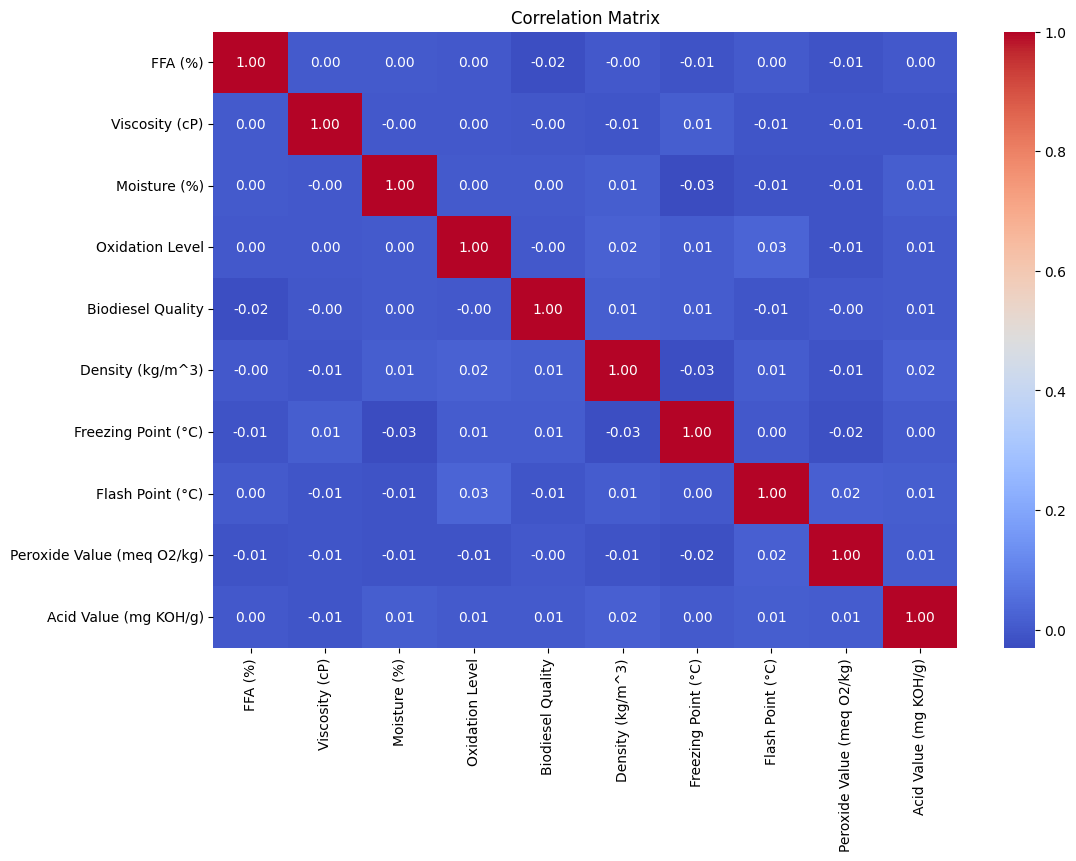

# **Features Engineering**


  - **Density-Freezing Interaction**: A combination of these two might indicate the biodiesel's potential to remain liquid in colder climates.
    ```
    Density-Freezing Interaction = Density / Freezing Point
    ```

  - **Normalized Difference**: Compute a difference between the density and freezing point (scaled appropriately) to reflect how far the biodiesel's density deviates from what is considered ideal at various temperatures.
    ```
    Density-Freezing Difference = Density - Freezing Point
    ```

  - **Flash-Peroxide Stability Ratio**: Combine **flash point** and **peroxide value** to form a ratio that captures the biodiesel's stability. Higher peroxide values could result in a lower flash point, meaning it’s less stable.
    ```
    Flash-Peroxide Stability Ratio = Flash Point / Peroxide Value
    ```

  - **Flash Point Difference from Max**: Calculate how far the flash point deviates from the maximum ideal value (170°C). This could show how safe the biodiesel is compared to the best possible scenario.
    ```
    Flash Point Difference = 170 - Flash Point
    ```

  - **Acid-FFA Interaction**: Create an interaction term to measure how acid content might affect the biodiesel production quality. This can highlight the need for additional processing steps (esterification).
    ```
    Acid-FFA Interaction = Acid Value * FFA
    ```

  - **Acid Value-to-FFA Ratio**: This ratio can indicate how much the free fatty acid concentration contributes to the total acid value.  ```
    Acid-to-FFA Ratio = Acid Value / FFA
    ```

  - **Moisture-Peroxide Interaction**: A combined feature that indicates whether moisture content and peroxide value are working together to degrade biodiesel quality. High moisture with high peroxide value can be a sign of poor-quality biodiesel.
    ```
    Moisture-Peroxide Interaction = Moisture Content * Peroxide Value
    ```

  - **Moisture-Peroxide Ratio**: This ratio can help in assessing how moisture affects the oxidation of biodiesel. If moisture is low and peroxide value is high, this could indicate poor quality.
    ```
    Moisture-Peroxide Ratio = Moisture Content / Peroxide Value
    ```


  - **Weighted Score**: Using domain knowledge, you can combine features like **density**, **flash point**, and **peroxide value** into a weighted score that represents biodiesel’s expected performance.
    ```
    Overall Quality Score = w1 * Density + w2 * Flash Point + w3 * (1 - Peroxide Value)
    ```

    Where `w1`, `w2`, and `w3` are weights based on the importance of each feature.


  - **Z-Score Normalization**: Normalize features like **FFA**, **acid value**, and **moisture content** using Z-scores to make them comparable
   Z-Score Normalized = (x - μ) / σ
   ```

    Where `μ` is the mean and `σ` is the standard deviation of the feature.



In [ ]:
import pandas as pd
import numpy as np

df['Density-Freezing Interaction'] = df['Density'] / df['Freezing Point'] # Combine Density and Freezing Point (Density-Freezing Interaction)
df['Density-Freezing Difference'] = df['Density'] - df['Freezing Point']
df['Flash-Peroxide Stability Ratio'] = df['Flash Point'] / (df['Peroxide Value'] + 1e-5)  # Combine Flash Point and Peroxide Value (Flash-Peroxide Stability Ratio)
df['Flash Point Difference'] = 170 - df['Flash Point']         # Calculate Flash Point Difference from Max (Max Flash Point = 170)
df['Acid-FFA Interaction'] = df['Acid Value'] * df['FFA']      # Combine Acid Value and Free Fatty Acids (Acid-FFA Interaction)
df['Acid-to-FFA Ratio'] = df['Acid Value'] / (df['FFA'] + 1e-5)  # Calculate Acid-to-FFA Ratio
df['Moisture-Peroxide Interaction'] = df['Moisture Content'] * df['Peroxide Value']   # Combine Moisture Content and Peroxide Value (Moisture-Peroxide Interaction)
df['Moisture-Peroxide Ratio'] = df['Moisture Content'] / (df['Peroxide Value'] + 1e-5)  # Calculate Moisture-Peroxide Ratio

df['FFA Normalized'] = (df['FFA'] - df['FFA'].mean()) / df['FFA'].std()   # Normalize Features using Z-Score (for features like FFA, Acid Value, and Moisture Content)
df['Acid Value Normalized'] = (df['Acid Value'] - df['Acid Value'].mean()) / df['Acid Value'].std()
df['Moisture Content Normalized'] = (df['Moisture Content'] - df['Moisture Content'].mean()) / df['Moisture Content'].std()

w1, w2, w3 = 0.4, 0.3, 0.3  # Weights, adjust based on feature importance
df['Overall Quality Score'] = (w1 * df['Density'] +
                                           w2 * df['Flash Point'] +
                                           w3 * (1 - df['Peroxide Value']))

df.head()


In [28]:
X = df.drop(columns='Biodiesel Quality')
y = df['Biodiesel Quality']
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # Standardize the data (important for many models)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


Model Accuracy: 69.60%


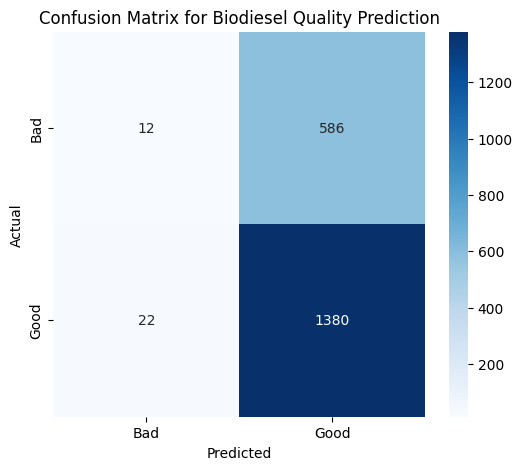

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.02      0.04       598
           1       0.70      0.98      0.82      1402

    accuracy                           0.70      2000
   macro avg       0.53      0.50      0.43      2000
weighted avg       0.60      0.70      0.59      2000



In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix for Biodiesel Quality Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")


In [19]:
importances = rf_model.feature_importances_  # Feature importance
feature_names = X.columns

# Display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                      Feature  Importance
5         Freezing Point (°C)    0.123818
7  Peroxide Value (meq O2/kg)    0.122744
0                     FFA (%)    0.122345
8       Acid Value (mg KOH/g)    0.122322
4            Density (kg/m^3)    0.121280
1              Viscosity (cP)    0.121169
2                Moisture (%)    0.119462
6            Flash Point (°C)    0.119434
3             Oxidation Level    0.027427
